# 실습 A2_박성건



# 라이브러리 불러오기

In [72]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import scipy.stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib.font_manager as fm


#passingerId, P-Class, servived -> 범주형이니까 object 타입으로 바꿔야한다.

# 폰트설정

In [73]:
%matplotlib inline
matplotlib.rc('font', family='NanumBarunGothic')
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams["axes.unicode_minus"] = False

# 데이터셋 불러오기

In [74]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/titanic.csv", engine='python',encoding='cp949')
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# isnull과 sum 함수를 통해 요소별로 널 값의 수를 확인가능

In [75]:
df_raw.isnull().sum() # 널값 가지고 있는 컬럼 수

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# isna().head()라는 함수를 통해 결측치를 파악할 수 있음

In [76]:
df_raw.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


# raw.info() 함수를 통해 정보확인

In [77]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# raw.drop함수를 통해 결측치가 많은 'Cabin'을 삭제

In [78]:
df_raw.drop(['Cabin'], axis='columns', inplace=True) #'결측치가 많은 Cabin' 열 삭제
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [79]:
df_raw.isnull().sum() # 널값 가지고 있는 컬럼 수

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [80]:
df_raw.describe().round(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,891.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.759,0.523,0.382,32.204
std,257.354,0.487,0.836,13.003,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,22.000,0.000,0.000,7.910
50%,446.000,0.000,3.000,30.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,35.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [81]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [82]:
df_raw["Embarked"].value_counts() # "Embarked"에서 가장 많이 나온 값으로 결측치를 채운다.
df_raw['Embarked'].fillna("S",inplace = True)

In [83]:
df_raw.isnull().sum() # 결측치가 없어진것을 확인할 수 있다.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [84]:
df = df_raw.astype({'PassengerId':'object','Survived':'object','Pclass':'object'})
print(df.dtypes)

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [85]:
df_titanic_num = df.select_dtypes(exclude = 'object') #numeric 변수만 뽑음
df_titanic_num.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


<AxesSubplot:>

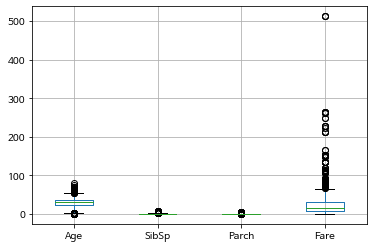

In [86]:
df_titanic_num.boxplot() # 이상치를 확인하기 위해 박스그래프를 그림

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'SibSp'}>]], dtype=object)

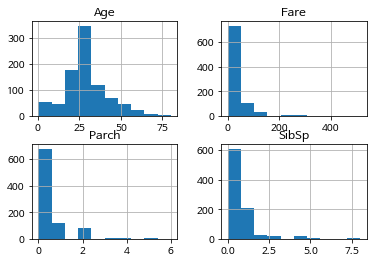

In [87]:
df_titanic_num.hist()

# 1. 여성이 남성보다 생존률이 높을것이다.
이 문제를 해결하기 위해서는 성별로 생존률을 확인하면 된다.
남성과 여성의 생존, 비생존을 히스토 그램으로 표시

<AxesSubplot:xlabel='Sex', ylabel='count'>

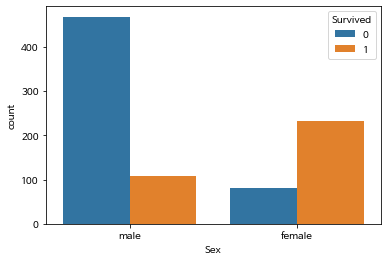

In [88]:
sns.countplot(x="Sex", hue="Survived",
             data = df,
             order = df['Sex'].value_counts().index)

# 그래프만 봐도 남성의 생존률이 여성의 생존률보다 작은걸 알 수 있다.
#왜냐하면 남자의 산사람의 수는 죽은 사람보다 적고, 여자의 산사람의 수는 죽은 사람의 수보다 2배 이상이다.

# 2. 나이가 어릴수록 생존률이 높을것이다.

아래 그래프를 분석해보면 나이가 어릴수록 생존자 수가 사망자 수보다 높다.
또한 생존률 그래프를 보면 나이가 들수록 생존률이 낮아진다.(대략 30살까지)

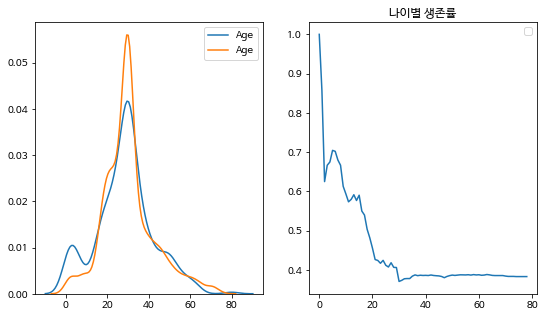

In [89]:
fig, ax = plt.subplots(1, 2, figsize = (9, 5))
sns.kdeplot(df[df['Survived'] == 1]['Age'], ax=ax[0])
sns.kdeplot(df[df['Survived'] == 0]['Age'], ax=ax[0])
plt.legend(['Survived == 1', 'Survived == 0'])


cummulate_survival_ratio = []
for i in range(1, 80):
	cummulate_survival_ratio.append(df[df['Age'] < i]['Survived'].sum() / len(
    df[df['Age'] < i]['Survived']))
 

ax[1].plot(cummulate_survival_ratio)
ax[1].set_title("나이별 생존률")

plt.show()